# Analysis of Cycling Data
# Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride.

In [1]:
#Importing libraries
import pandas as pd
import pytz as pytz
from matplotlib import pyplot as plt
from datetime import timedelta
from pytz import timezone
plt.style.use('seaborn')
%matplotlib inline
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
aus = pytz.timezone('Australia/Sydney')
strava.index = strava.index.tz_convert(aus)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [2]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## My Tasks

My first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [3]:
combined_dataframe = strava.join(cheetah, how='inner')
combined_dataframe.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


# Required Analysis

1.) We want to remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides. so, i am taking device_watts == 1 so that all the True values should be displayes.

In [4]:
remove_rides=combined_dataframe[combined_dataframe.device_watts==1]
remove_rides

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


2.) Let's look at the distributions of some key variables: time, distance, average speed, average power, TSS. We need to check are they normally distributed? or Skewed?

In [5]:
var_relations = remove_rides[['elapsed_time','distance','Average Speed','average_watts','TSS']]
var_relations.head()

,elapsed_time,distance,Average Speed,average_watts,TSS
2018-01-28 06:39:49+11:00,17,7.6,26.0234,153.4,20.2257
2018-01-28 07:01:32+11:00,67,38.6,34.4380,187.7,94.5787
2018-02-06 08:06:42+11:00,69,24.3,22.2417,165.9,98.3269
2018-02-07 17:59:05+11:00,144,47.1,20.7841,151.0,171.0780
2018-02-10 06:18:03+11:00,193,59.8,25.6585,145.9,147.7970


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D93E9DF48>]],
      dtype=object)

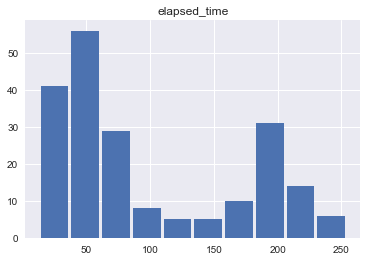

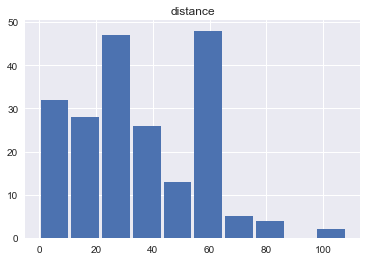

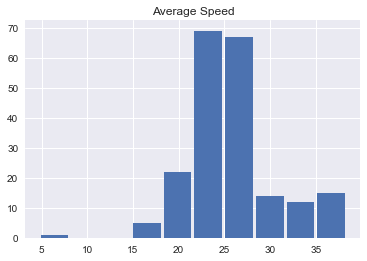

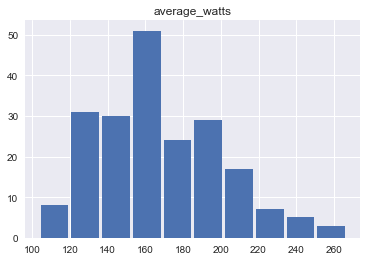

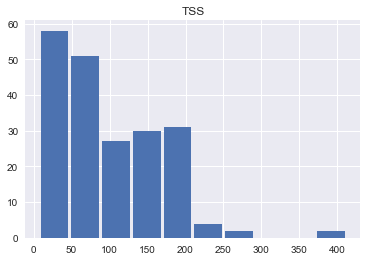

In [6]:
var_relations.hist(column='elapsed_time', rwidth=0.9)
var_relations.hist(column='distance', rwidth=0.9)
var_relations.hist(column='Average Speed', rwidth=0.9)
var_relations.hist(column='average_watts', rwidth=0.9)
var_relations.hist(column='TSS', rwidth=0.9)

Variables are plotted in histogram format so that we can know that which variables are Skewed? or Normal distribited?

Answers are as:

 elapsed_time looks like Skewed Right,
 distancelooks like Skewed Right,
 Average Speed looks like left skewed,
 average_watts looks like Normal Distributed,
 TSS looks like Skewed Right

3.) Explore the relationships between the following variables. Are any of them corrolated with each other? Can we explain any relationships we observe?

Distance, 
Moving Time, 
Average Speed, 
Heart Rate, 
Power (watts), 
Normalised power (NP), 
Training Stress Score, 
Elevation Gain

In [7]:
var_corelation= remove_rides[['distance', 'moving_time','Average Speed', 'average_heartrate','average_watts', 'NP', 'elevation_gain', 'TSS']]
var_corelation

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,elevation_gain,TSS
2018-01-28 06:39:49+11:00,7.6,17,26.0234,120.6,153.4,222.856,95.00 m,20.2257
2018-01-28 07:01:32+11:00,38.6,67,34.4380,146.9,187.7,245.365,449.00 m,94.5787
2018-02-06 08:06:42+11:00,24.3,65,22.2417,119.3,165.9,253.702,439.00 m,98.3269
2018-02-07 17:59:05+11:00,47.1,134,20.7841,124.8,151.0,232.644,890.00 m,171.0780
2018-02-10 06:18:03+11:00,59.8,139,25.6585,123.0,145.9,212.726,656.00 m,147.7970
...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,58.2,136,25.4524,NaN,166.8,222.988,666.00 m,159.3630
2019-07-27 06:12:56+10:00,59.6,139,25.5036,120.8,166.9,236.028,663.00 m,183.1140
2019-07-28 06:42:59+10:00,19.8,47,24.3316,122.0,168.4,212.020,247.00 m,51.1646
2019-07-28 07:47:24+10:00,29.1,50,34.8044,144.4,235.2,267.699,415.00 m,83.5620


In [8]:
var_corelation.corr(method ='pearson')

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,TSS
distance,1.000000,0.972260,0.110461,0.078131,0.031858,0.202935,0.920085
moving_time,0.972260,1.000000,-0.100980,-0.079929,-0.112507,0.092046,0.909389
Average Speed,0.110461,-0.100980,1.000000,0.726858,0.720608,0.507974,0.037499
average_heartrate,0.078131,-0.079929,0.726858,1.000000,0.672457,0.578104,0.080077
average_watts,0.031858,-0.112507,0.720608,0.672457,1.000000,0.772574,0.150163
NP,0.202935,0.092046,0.507974,0.578104,0.772574,1.000000,0.425102
TSS,0.920085,0.909389,0.037499,0.080077,0.150163,0.425102,1.000000


Here, I am showing data usning pairplot. Pirplot provides a clear visualization of corelations between each variables.

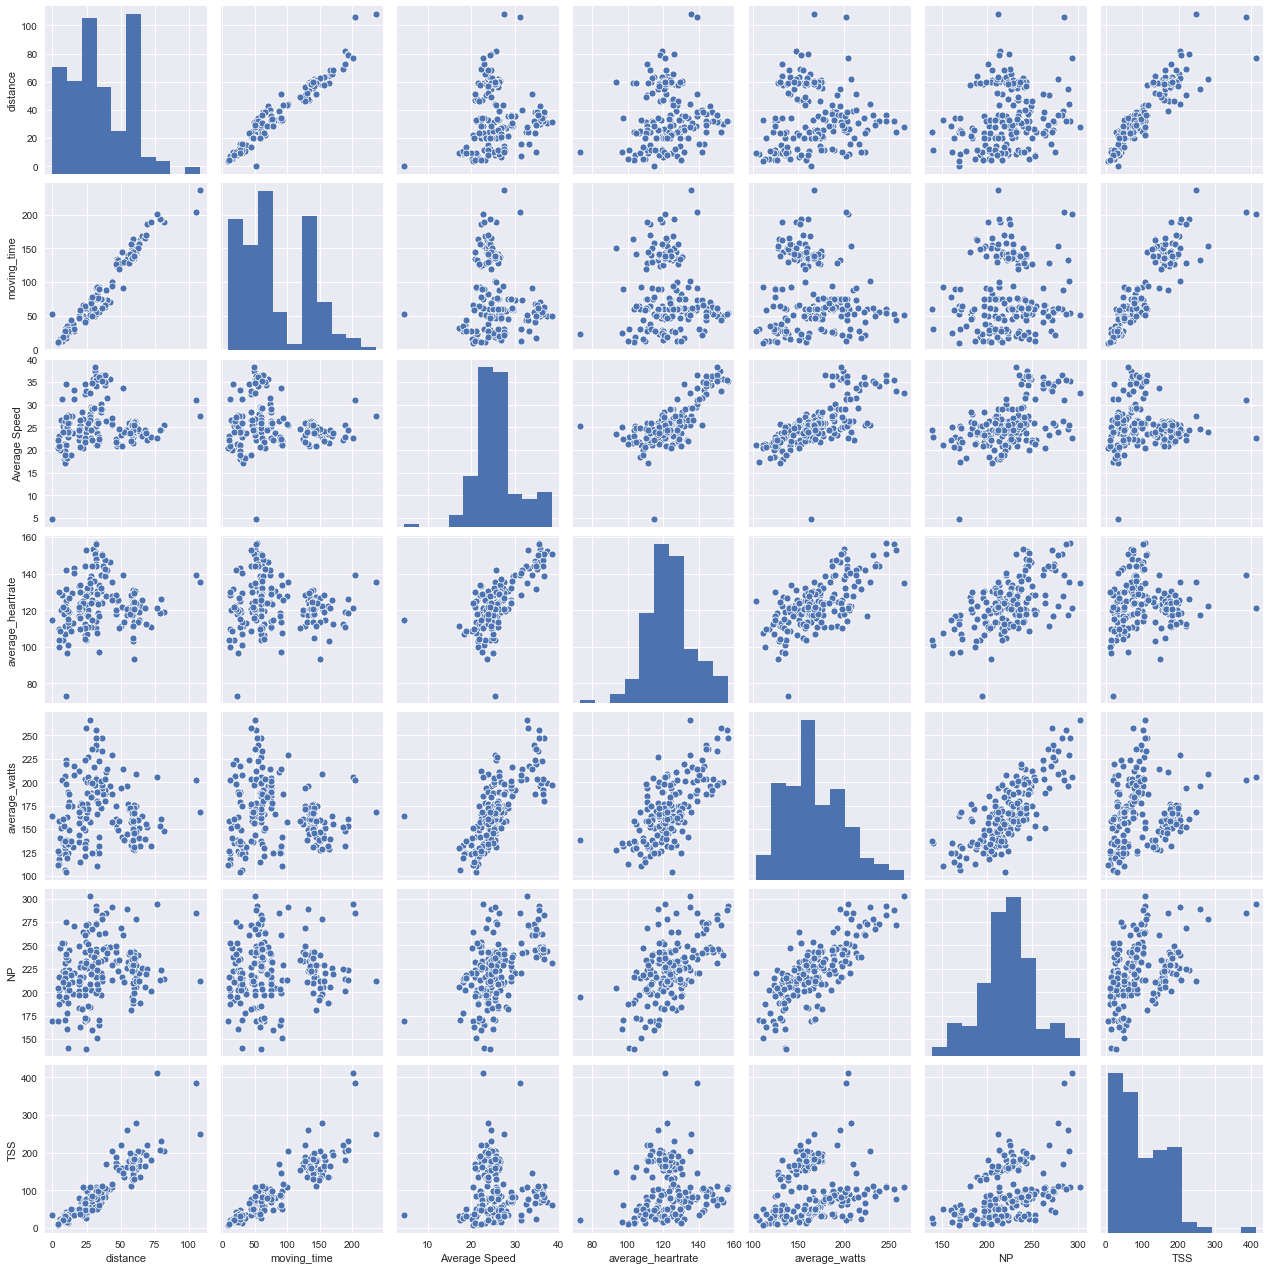

In [9]:
import seaborn as sns
sns.pairplot(var_corelation)

Answers:

 strong corelation between distance and elapsed_time,
 
 strong corelation between TSS and Distance, 
 
 strong corelation between elapsed_time, TSS and average_watts,
 
 weak corelation between NP, Average_watt and average_speed

4.) Some of the rides are designated as "Race" in the workout_type field, these are where I am racing and you might expect that these would be the most challenging rides. Normalised Power (NP) is a good measure of how hard a ride is. Explore the values of NP for races vs the overall set of rides to see if this hypothesis is supported. We have to check here, are races more challenging than rides in general?

In [10]:
#loading only two colums NP, and workout_type.
measure_rides_races=pd.DataFrame(remove_rides,columns =['NP', 'workout_type'])
measure_rides_races

,NP,workout_type
2018-01-28 06:39:49+11:00,222.856,Ride
2018-01-28 07:01:32+11:00,245.365,Race
2018-02-06 08:06:42+11:00,253.702,Ride
2018-02-07 17:59:05+11:00,232.644,Ride
2018-02-10 06:18:03+11:00,212.726,Ride
...,...,...
2019-07-20 06:22:49+10:00,222.988,Ride
2019-07-27 06:12:56+10:00,236.028,Ride
2019-07-28 06:42:59+10:00,212.020,Ride
2019-07-28 07:47:24+10:00,267.699,Race


In [11]:
#Now, lets use groupby function and mean function. We are doing this to know the power of NP for race and ride.
measure_rides_races.groupby(['workout_type']).mean()

,NP
workout_type,
Race,259.659103
Ride,216.283397
Workout,222.086240


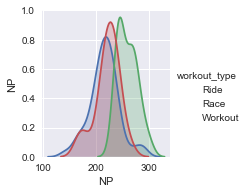

In [12]:
import seaborn as sns
sns.pairplot(measure_rides_races,hue='workout_type')

Answer:
    
Yes, Race is more challenging than rides because the mean value of race is more than ride mean value

5.) Let's enerate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.

Note: To generate these summary plots we need to use the timeseries/date functionality in Pandas to generate a new data frame containing the required data.

Here, we will speerate rides by year.

In [13]:
summary_rides=remove_rides[remove_rides.workout_type=='Ride']
year_2018=summary_rides['2018']
year_2019=summary_rides['2019']

year_2018a=year_2018.groupby(year_2018.index.month)
year_2019a=year_2019.groupby(year_2019.index.month)

Plot that summarises the number of km ridden each month over the period of the data for year 2018.

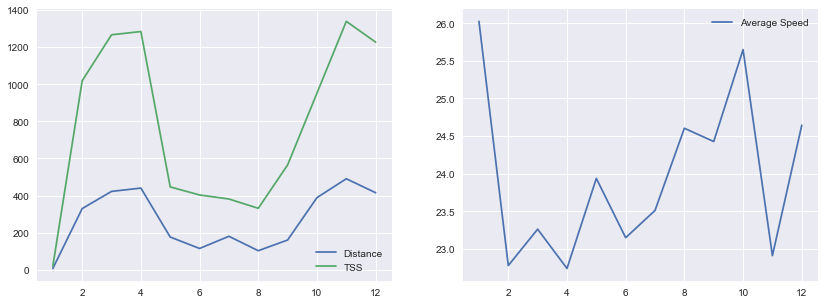

In [14]:
plt.figure(figsize=(14,5))

distribution_distance = year_2018a.distance.sum().to_frame()
distribution_tss= year_2018a.TSS.sum().to_frame()

plt.subplot(1,2,1)
plt.plot(distribution_distance)
plt.plot(distribution_tss)
plt.legend(labels=['Distance', 'TSS'])

plt.subplot(1,2,2)
plt.plot(year_2018a['Average Speed'].mean())
plt.legend(labels=['Average Speed'])

Plot that summarises the number of km ridden each month over the period of the data for year 2019.

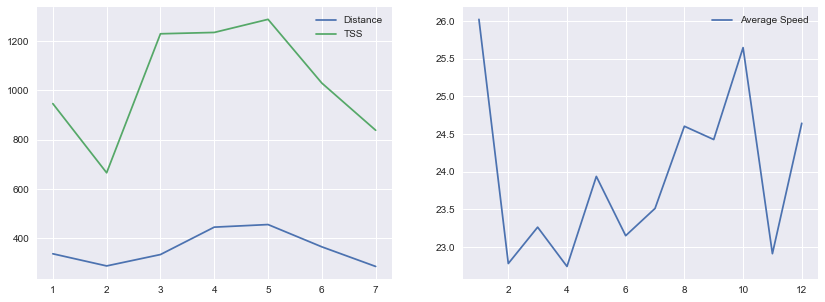

In [15]:
plt.figure(figsize=(14,5))

distribution_distance = year_2019a.distance.sum().to_frame()
distribution_tss= year_2019a.TSS.sum().to_frame()

plt.subplot(1,2,1)
plt.plot(distribution_distance)
plt.plot(distribution_tss)
plt.legend(labels=['Distance', 'TSS'])

plt.subplot(1,2,2)
plt.plot(year_2018a['Average Speed'].mean())
plt.legend(labels=['Average Speed'])

# Challenge

1.) What leads to more kudos? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe.

In [16]:
kudos_var_relations=pd.DataFrame(remove_rides,columns =['kudos', 'workout_type', 'Duration', 'average_heartrate', 'average_temp', 'average_watts', 'elevation_gain', 'moving_time', 'NP', 'distance','TSS','elapsed_time'
])
kudos_var_relations.sort_values(by=['kudos', 'workout_type'], ascending=False)

,kudos,workout_type,Duration,average_heartrate,average_temp,average_watts,elevation_gain,moving_time,NP,distance,TSS,elapsed_time
2019-04-28 07:04:04+10:00,24,Race,3387,NaN,6.0,223.0,347.00 m,56,262.147,33.9,90.0185,56
2018-10-28 06:09:36+11:00,23,Ride,14912,126.1,15.0,160.5,1394.00 m,193,223.988,79.8,229.7560,248
2018-02-10 06:18:03+11:00,22,Ride,11637,123.0,20.0,145.9,656.00 m,139,212.726,59.8,147.7970,193
2018-04-22 09:04:53+10:00,22,Ride,14885,135.5,19.0,167.7,1342.00 m,236,212.443,108.2,248.4670,248
2018-10-20 06:20:52+11:00,22,Ride,12092,124.9,17.0,157.9,680.00 m,139,223.463,59.7,163.4420,201
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28 06:50:01+10:00,3,Ride,1801,113.3,NaN,174.6,0.00 m,30,208.361,11.6,30.3739,30
2019-06-28 17:52:10+10:00,3,Ride,1929,NaN,11.0,136.9,201.00 m,28,215.366,9.1,31.3743,32
2019-07-07 07:24:37+10:00,3,Ride,1200,122.0,8.0,160.7,112.00 m,19,210.929,7.8,20.6481,19
2019-06-10 08:26:02+10:00,2,Ride,1167,130.1,11.0,124.6,49.00 m,12,195.399,4.5,12.0493,19


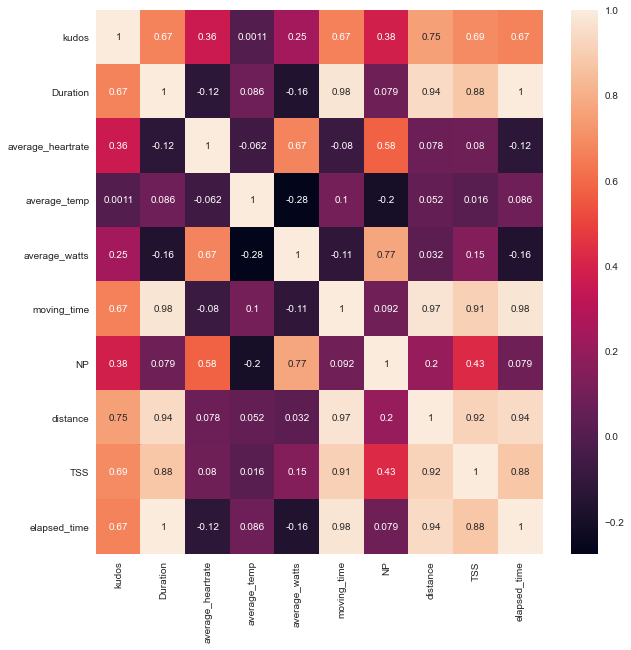

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(kudos_var_relations.corr(), annot=True)

2.) We will generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown. So, if there are two rides on a given day, the graph should show the sum of the distances for these rides.

In [20]:
sum_days=year_2018.groupby(['date'])['distance'].sum()
sum_days

date
01/28/18     7.6
02/06/18    24.3
02/07/18    47.1
02/10/18    59.8
02/11/18     7.8
            ... 
12/16/18    65.5
12/18/18    26.0
12/26/18    69.2
12/29/18    60.8
12/31/18    52.2
Name: distance, Length: 68, dtype: float64

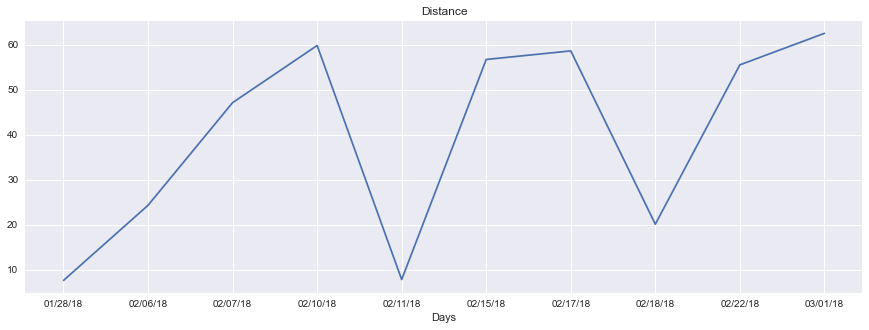

In [21]:
plt.figure(figsize=(15,5))
plt.plot(sum_days.head(10))
plt.title("Distance")
plt.xlabel("Days")
plt.show()